### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### ripple_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/ripple_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,0.205110,0.218674,0.190232,0.215189,"242,636,000","7,864,700,000"
1,2017-09-04,0.228781,0.228781,0.195960,0.204968,"239,613,000","8,772,340,000"
2,2017-09-03,0.227229,0.236443,0.218662,0.228811,"186,526,000","8,712,840,000"
3,2017-09-02,0.249348,0.249680,0.217774,0.226669,"329,928,000","9,560,940,000"
4,2017-09-01,0.255803,0.256162,0.243833,0.248479,"283,576,000","9,808,460,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          1494
Open          1494
High          1494
Low           1494
Close         1494
Volume        1494
Market Cap    1494
dtype: int64

as we can see we have in this file 7 columns and each column has 1494 cells

In [8]:
df.describe()

,Open,High,Low,Close
count,1494.000000,1494.000000,1494.000000,1494.000000
mean,0.027803,0.029456,0.026254,0.027934
std,0.063325,0.067624,0.059060,0.063490
min,0.002809,0.003082,0.002802,0.002810
25%,0.005974,0.006084,0.005894,0.005982
50%,0.007478,0.007698,0.007296,0.007484
75%,0.012785,0.013157,0.011890,0.012859
max,0.394931,0.435170,0.332222,0.394132


In [9]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
Date          1494 non-null datetime64[ns]
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1494 non-null object
Market Cap    1494 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 81.8+ KB


In [10]:
#check if the dataset is duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1489    False
1490    False
1491    False
1492    False
1493    False
Length: 1494, dtype: bool

as we can see the data fram has 7 columns. each column has 1494 cells, and there is no missing data,but we hve to convert the dt type of the variables "Volume" and "Market Cap" to number


In [13]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [14]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'str'>
Market Cap Data Type : <class 'str'>


In [15]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Market Cap
count,1494.000000,1494.000000,1494.000000,1494.000000,1.494000e+03
mean,0.027803,0.029456,0.026254,0.027934,9.496100e+08
std,0.063325,0.067624,0.059060,0.063490,2.456712e+09
min,0.002809,0.003082,0.002802,0.002810,2.196030e+07
25%,0.005974,0.006084,0.005894,0.005982,1.413848e+08
50%,0.007478,0.007698,0.007296,0.007484,2.292110e+08
75%,0.012785,0.013157,0.011890,0.012859,2.852108e+08
max,0.394931,0.435170,0.332222,0.394132,1.512820e+10


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
Date          1494 non-null datetime64[ns]
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1494 non-null object
Market Cap    1494 non-null float64
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 81.8+ KB


In [18]:
# If Volume is equal to '-' convert it to 0
df.loc[df['Volume']=="-",'Volume']=0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 7 columns):
Date          1494 non-null datetime64[ns]
Open          1494 non-null float64
High          1494 non-null float64
Low           1494 non-null float64
Close         1494 non-null float64
Volume        1494 non-null int64
Market Cap    1494 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 81.8 KB


In [20]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.995903,0.996764,0.994684,0.629673,0.996719
High,0.995903,1.000000,0.994108,0.997927,0.665507,0.992569
Low,0.996764,0.994108,1.000000,0.996630,0.619949,0.993731
Close,0.994684,0.997927,0.996630,1.000000,0.648078,0.991578
Volume,0.629673,0.665507,0.619949,0.648078,1.000000,0.631884
Market Cap,0.996719,0.992569,0.993731,0.991578,0.631884,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


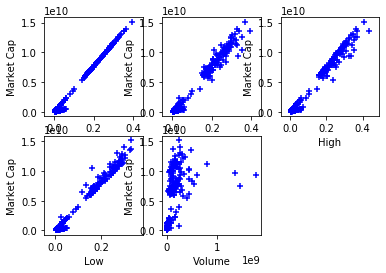

In [21]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [22]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [23]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
# Model Score
model.score(Open, Market_Cap)

0.993447840260168

#### 4. Data Visualization

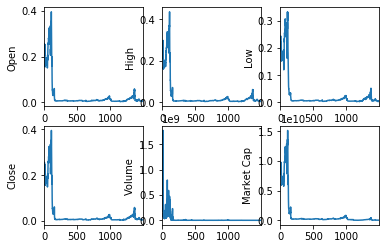

In [25]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()